In [1]:
import gym
import os
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
# 그냥 argmax를 하게되면 큰값 만 준다.
# 처음에 모두 0인 상황에서 랜덤하게 가도록 설정함. 
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

In [3]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name' : '4x4',
              'is_slippery' : False
    })
#IS_SLIPPERY FALSE : 미끄럽지 않게 하도록 설정하는것

In [4]:
env = gym.make('FrozenLake-v3')

[2017-04-17 20:31:27,318] Making new env: FrozenLake-v3


In [5]:
Q = np.zeros([env.observation_space.n,env.action_space.n])

In [6]:
num_episodes = 2000

In [7]:
rList = []

In [8]:
#Q-Learning - 학습을 진행하는 단계 

for i in range(num_episodes):
    #환경 초기화
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = rargmax(Q[state,:])
        new_state, reward, done, _ = env.step(action)
        Q[state,action] = reward + np.max(Q[new_state,:])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

In [9]:
print("Success rate :" + str(sum(rList)/num_episodes))

Success rate :0.91


In [10]:
print("Final Q-table Values")
print("Left down Right up")
print(Q)

Final Q-table Values
Left down Right up
[[ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


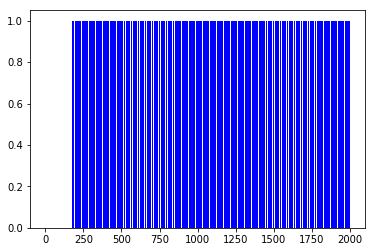

In [11]:
plt.bar(range(len(rList)), rList,color="blue")
plt.show()

In [12]:
env.reset()

0